출처: [ca.sfu.ca](http://www.cs.sfu.ca/~ggbaker/data-science/content/stats-tests.html) , [statedu](http://www.statedu.com/lecture/99807)

# 사후검정(Post Hoc Analysis)의 필요성

ANOVA 분석의 문제는 다르다는 것은 알지만, 어떤 집단간의 차이가 있는지는 알 수 없다는 것입니다. 그래서 만들어진 방법이 사후검정입니다. 

> post hoc은 라틴어로 "after this"의 뜻입니다. 

사후검정에도 여러 종류가 있습니다. 그 중에서 대표적으로 쓰이는 3가지를 꼽으면 아래와 같습니다. 

- Tukey's HSD (Honest Significant Difference) test.
- Duncan’s new multiple range test (MRT)
- Scheffé’s Method

여기에서 명칭들은 모두 해당 방법을 개발한 학자의 이름을 따서 Tukey, Duncan, Scheffe라고 부르겠습니다. 각각을 민감도(sensitivity)로 구분하면 Scheffe < Tukey < Duncan 로 볼 수 있습니다. 

다시말해, Duncan의 방법은 작은 차이에도 차이가 난다라고 하지만, Scheffe의 방법은 확실한 차이가 나야만 비로소 차이가 있다라고 판단합니다. 

자연과학에서 실험을 할 경우에는 Tukey의 방법을 주로 이용하며, Duncan은 사회과학, 심리학 등과 설문조사인 경우에 많이 이용하고 있습니다.


# Tukey' HSD test

저는 Tukey test를 파이썬으로 수행해보려고 합니다. 파이썬에서는 이미 `statsmodels`라이브러리에 구현이 되어 가져다 쓰기만 하면 됩니다.

이전 포스팅인 [파이썬으로 ANOVA 분석](./ANOVA_python.ipynb) 의 예제를 재사용 하겠습니다. 

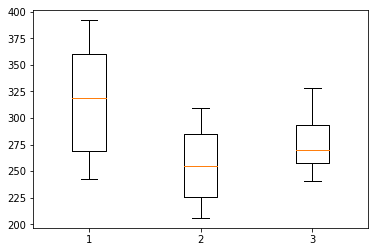

In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# pandas로 데이터 불러오기
df = pd.DataFrame(data,columns=['value', 'treatment']).set_index('treatment')

# 예시 데이터 시각화 하기
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

이 예제는 ANOVA 분석을 통해 통계적으로 유의한 차이가 있다는것을 알아 냈는데요. 이번에는 사후검정을 해보도록 하겠습니다.

`statsmodels`의 **Tukey test**를 하기 위해서는 `dataframe`의 형태를 변경해줘야 합니다. 하나의 컬럼은 분류할수 있는 이름(label)을 다른 컬럼은 실험값(values)를 가지고 있는 형태여야 하죠. 하지만 걱정할것은 없어요. `pandas`를 사용하면 간단하게 할 수 있습니다.


In [2]:
df.head()

,value
treatment,
1.0,243.0
1.0,251.0
1.0,275.0
1.0,291.0
1.0,347.0


원래의 데이터 형태는 위와 같습니다. 이것을 `reset_index()` 기능을 사용해 index를 풀어줍니다.

In [3]:
df2 = df.reset_index()
df2.head()

,treatment,value
0,1.0,243.0
1,1.0,251.0
2,1.0,275.0
3,1.0,291.0
4,1.0,347.0


데이터는 다 준비가 되었습니다. 이제 사후검증인 [Tukey test](http://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)을 해보겠습니다.

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df2['value'], df2['treatment'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper  reject
-----------------------------------------------
 1.0    2.0   -60.1806 -116.6056 -3.7555  True 
 1.0    3.0   -38.625  -104.8246 27.5746 False 
 2.0    3.0   21.5556   -43.2141 86.3252 False 
-----------------------------------------------


결과를 보면 그룹 1.0과 2.0에서만 통계적인 유의미성(P-value < 0.05)을 가질 수 있는것을 확인 할 수 있습니다. 이제 시각화를 통해 직관적으로 살펴보죠.

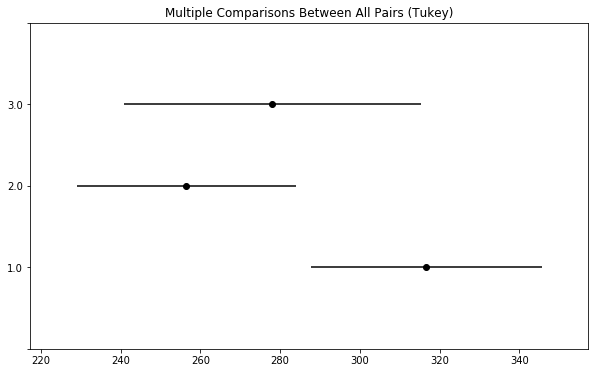

In [5]:
fig = posthoc.plot_simultaneous()

그림에서 볼 수 있듯이, 그룹 1.0과 2.0은 서로 겹치지 않는것을 볼 수 있습니다. 반면에 다른 경우에서는 겹치기 때문에 유의미한 차이가 없다고 할 수 있죠.

# 결론

1. 분산분석(ANOVA)를 통해 3가지 그룹간에 통계적인 차이가 있다는 것을 증명했고,
2. 사후검정을 통해 그룹 1.0과 2.0의 평균이 유의미한 차이가 있다는 것을 보았습니다. 